# 1. Perkenalan Dataset

Dataset diambil dari kaggle https://www.kaggle.com/datasets/mitanshuchakrawarty/water-quality-prediction/discussion?sort=hotness namun untuk dataset yang saya gunakan sudah dimodifikasi hanya menjadi 100.000 data saja dan bisa didownload di https://drive.google.com/file/d/1NPnyvMMa4EgRMpCWd1LOOVGeOOmtcC6f/view

# 2. Import Library

In [ ]:

#Library Basic
import numpy as np
import pandas as pd

#Library Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#Library untuk Preprocessing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PowerTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Library untuk Membangun Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold

#Library untuk Evaluasi
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn import tree
import joblib

# 3. Memuat Dataset

In [19]:
df = pd.read_csv('water_quality_dataset_100k_new.csv')

## 4. Exploratory Data Analysis (EDA)

In [5]:
df.shape

(100000, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Index                   100000 non-null  int64  
 1   pH                      97979 non-null   float64
 2   Iron                    99328 non-null   float64
 3   Nitrate                 98204 non-null   float64
 4   Chloride                97045 non-null   float64
 5   Lead                    99571 non-null   float64
 6   Zinc                    97439 non-null   float64
 7   Color                   99901 non-null   object 
 8   Turbidity               99167 non-null   float64
 9   Fluoride                96784 non-null   float64
 10  Copper                  96785 non-null   float64
 11  Odor                    97034 non-null   float64
 12  Sulfate                 96723 non-null   float64
 13  Conductivity            97215 non-null   float64
 14  Chlorine             

Bisa kita lihat bahwa, data Training terdapat 100000 baris dan 23 fitur + 1 target variabel. Fitur - fitur tersebut teradpat tipe float64, int64, dan object.

<table>
    <tr>
        <th>Fitur</th>
        <th>Deskripsi</th>
    </tr>
    <tr>
        <td>Index</td>
        <td>Pengidentifikasi unik untuk setiap entri data</td>
    </tr>
    <tr>
        <td>pH</td>
        <td>Tingkat pH air dari 0 - 14, yang menunjukkan keasaman atau kebasaannya</td>
    </tr>
    <tr>
        <td>Iron</td>
        <td>Konsentrasi zat besi dalam air (dalam mg/L)</td>
    </tr>
    <tr>
        <td>Nitrate</td>
        <td>Konsentrasi nitrat di dalam air (dalam mg/L).</td>
    </tr>     
    <tr>
        <td>Chloride</td>
        <td>Konsentrasi klorida dalam air (dalam mg/L).</td>
    </tr>   
    <tr>
        <td>Lead</td>
        <td>Konsentrasi timbal dalam air (dalam mg/L).</td>
    </tr>      
    <tr>
        <td>Zinc</td>
        <td>Konsentrasi seng di dalam air (dalam mg/L).</td>
    </tr> 
    <tr>
        <td>Color</td>
        <td>Warna sampel air (misalnya, Tidak Berwarna, Kuning Pucat).</td>
    </tr>
    <tr>
        <td>Turbidity</td>
        <td>Kekeruhan atau kekeruhan air, diukur dalam Nephelometric Turbidity Units (NTU).</td>
    </tr>    
     <tr>
        <td>Fluoride</td>
        <td>Konsentrasi fluorida di dalam air (dalam mg/L).</td>
    </tr>   
     <tr>
        <td>Copper</td>
        <td>Konsentrasi tembaga dalam air (dalam mg/L).</td>
    </tr>   
     <tr>
        <td>Odor</td>
        <td>Istilah deskriptif untuk bau air (misalnya, tidak berbau, bau samar).</td>
    </tr>   
     <tr>
        <td>Sulfate</td>
        <td>Konsentrasi sulfat dalam air (dalam mg/L).</td>
    </tr>   
     <tr>
        <td>Conductivity</td>
        <td>Kemampuan air untuk menghantarkan listrik, diukur dalam mikrosiemens per sentimeter (µS/cm).</td>
    </tr>   
     <tr>
        <td>Chlorine</td>
        <td>Konsentrasi klorin dalam air (dalam mg/L).</td>
    </tr>   
     <tr>
        <td>Manganese</td>
        <td>Konsentrasi mangan di dalam air (dalam mg/L).</td>
    </tr>   
     <tr>
        <td>Total Dissolved Substances (TDS)</td>
        <td>Konsentrasi total zat terlarut dalam air (dalam mg/L).</td>
    </tr>   
     <tr>
        <td>Source</td>
        <td>Sumber sampel air (misalnya, Danau, Sungai, Tanah).</td>
    </tr>   
     <tr>
        <td>Water Temperature</td>
        <td>Suhu air pada saat pengukuran (dalam °C).</td>
    </tr>   
     <tr>
        <td>Air Temperature</td>
        <td>Suhu udara pada saat pengukuran (dalam °C).</td>
    </tr>   
     <tr>
        <td>Month</td>
        <td>Bulan ketika sampel diambil.</td>
    </tr>   
     <tr>
        <td>Day</td>
        <td>Hari dalam bulan ketika sampel diambil.</td>
    </tr>   
     <tr>
        <td>Time of Day</td>
        <td>Waktu saat sampel diambil (misalnya, 0 untuk tengah malam, 12 untuk siang hari).</td>
    </tr>   
     <tr>
        <td>Target</td>
        <td>Variabel target biner yang menunjukkan apakah kualitas air memenuhi standar tertentu (0 untuk memenuhi standar dan aman untuk diminum, 1 untuk tidak memenuhi standar dan tidak aman untuk diminum).</td>
    </tr>   
</table>

Ringkasan Statistik Dataset

In [7]:
df.describe()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,...,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target
count,1.000000e+05,97979.000000,9.932800e+04,98204.000000,97045.000000,9.957100e+04,9.743900e+04,9.916700e+04,96784.000000,9.678500e+04,...,96723.000000,97215.000000,98992.000000,9.817000e+04,99961.000000,97190.000000,99521.000000,98309.000000,98064.000000,100000.000000
mean,2.972744e+06,7.450048,1.275435e-01,6.154743,184.254852,1.759505e-03,1.553338e+00,5.151431e-01,0.963694,5.157433e-01,...,146.012257,425.602265,3.251744,1.067892e-01,267.386161,19.161161,60.019117,15.723321,11.513461,0.303060
std,1.717248e+06,0.891517,4.743079e-01,3.236141,68.306315,3.751641e-02,1.546706e+00,9.105212e-01,0.818756,5.914996e-01,...,68.289200,190.475063,0.731622,4.669622e-01,155.972565,11.382027,18.107604,8.800908,6.921008,0.459583
min,9.900000e+01,2.353677,9.298435e-39,0.587550,29.413497,0.000000e+00,1.270699e-07,3.119116e-13,0.000072,5.313946e-07,...,14.762419,28.615895,1.085141,5.156055e-39,0.013253,1.692632,-19.940412,1.000000,0.000000,0.000000
25%,1.486767e+06,6.897409,9.697968e-06,3.953114,138.199592,3.575708e-122,4.176054e-01,3.848924e-02,0.377357,1.301375e-01,...,98.082144,286.397011,2.741320,2.405061e-06,132.897849,11.365014,47.840514,8.000000,6.000000,0.000000
50%,2.965422e+06,7.459988,2.275870e-03,5.593961,175.790181,2.963497e-62,1.082226e+00,2.081580e-01,0.778309,3.481229e-01,...,134.733706,398.014431,3.207097,6.345394e-04,266.045828,16.466972,59.983640,16.000000,12.000000,0.000000
75%,4.462456e+06,8.018791,5.499786e-02,7.655207,218.162046,4.659272e-27,2.236318e+00,6.226299e-01,1.338076,6.998091e-01,...,181.821092,533.384862,3.703591,1.631163e-02,398.800312,23.921549,72.132507,23.000000,18.000000,1.000000
max,5.956833e+06,12.392381,1.322768e+01,51.613366,993.933248,4.656781e+00,1.904981e+01,1.733592e+01,12.988166,8.133315e+00,...,1236.343971,1958.124307,10.425895,1.421583e+01,579.793550,165.919987,137.532364,31.000000,23.000000,1.000000


In [8]:
df.head()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,3343584,7.262136,0.002857,5.965704,245.101184,6.679537e-44,0.702867,Faint Yellow,0.014223,0.583591,...,2.835370,8.067879e-03,153.126744,Spring,11.179752,55.340114,August,20.0,17.0,0
1,4332797,6.827967,0.000356,8.650092,261.948686,2.751868e-159,0.205934,Colorless,0.339881,2.214786,...,3.228036,4.245956e-05,260.391845,Ground,12.573723,80.335206,June,26.0,2.0,1
2,2580354,NaN,0.000063,NaN,176.192348,NaN,0.896104,Near Colorless,0.122076,1.566183,...,2.863932,1.646600e-03,131.984171,Reservoir,12.702576,81.535521,January,4.0,16.0,0
3,484305,7.782600,0.051721,3.747001,224.053938,1.513023e-136,0.088500,Colorless,0.209460,0.693032,...,4.195383,5.283502e-11,447.051626,NaN,13.009862,72.845282,May,13.0,1.0,0
4,1026518,7.627800,0.000172,7.988966,89.478315,3.450032e-76,0.402281,Colorless,0.520102,1.130603,...,4.004640,9.799640e-03,395.187898,Ground,17.727374,36.844691,December,25.0,18.0,0


In [9]:
df.tail()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
99995,4868170,6.878051,4.117124e-07,5.322810,108.110638,8.696207e-159,3.182844,Colorless,0.278222,1.282346,...,3.844900,0.003613,490.345588,Lake,9.796617,38.218949,May,21.0,7.0,0
99996,468267,6.234022,1.117469e-01,17.328060,419.511947,3.996521e-146,0.279021,Yellow,0.152766,1.119400,...,2.896578,0.003589,355.272379,Well,15.855275,63.903902,March,18.0,12.0,0
99997,3189489,7.861995,3.820164e-05,4.304552,215.233572,2.909526e-124,0.009500,Near Colorless,0.027866,0.093040,...,2.131950,0.001754,337.180755,River,37.648185,72.763230,May,15.0,12.0,0
99998,4503294,7.865141,4.720492e-02,1.782478,192.690548,8.000041e-221,0.303846,Colorless,0.004299,0.423846,...,NaN,0.019720,307.239395,Stream,7.719304,46.404757,December,22.0,17.0,0
99999,3456164,8.590040,3.168677e-04,4.373577,196.374090,2.664295e-03,0.483866,Near Colorless,1.262112,0.943935,...,3.838088,0.287297,164.660271,Reservoir,12.657137,63.647430,November,12.0,19.0,1


Dari ringkasan statistik di atas, bisa dilihat bahwa beberapa fitur memiliki nilai Nan yang berarti kosong, kita juga bisa melihat mean dari beberapa variabel yang masuk akal seperti ph memiliki mean di sekitar 7.

### Data Preprocessing

Pada bagian ini kita akan melihat apakah pada dataset yang digunakan memiliki duplicated values, missing values, dan apakah fitur tersebut perlu digunakan atau tidak.

In [10]:
df.nunique().to_frame(name='Unique Values')

,Unique Values
Index,100000
pH,97903
Iron,99250
Nitrate,98127
Chloride,96975
Lead,96978
Zinc,97366
Color,5
Turbidity,99091
Fluoride,96713


Dari, uniquenuess dari setiap fitur kita bisa melihat bahwa Index memiliki uniqueness di setiap data dimana fitur index itu sendiri tidak akan menambah informasi untuk analisis maka akan kita drop saja.

In [20]:
df = df.drop(columns=['Index'])

Selanjutnya, kita akan melihat Persentasi dari Missing Values atau nilai yang kosong dimana kalau nilai kosong dari suatu fitur itu lebih dari 30% dari total data maka akan saya hapus saja fiturnya, sedangkan jika pada target memiliki nilai yang kosong maka akan saya hapus saja baris yang memiliki nilai target kosong.

In [16]:
df.isnull().sum()

pH                        2021
Iron                       672
Nitrate                   1796
Chloride                  2955
Lead                       429
Zinc                      2561
Color                       99
Turbidity                  833
Fluoride                  3216
Copper                    3215
Odor                      2966
Sulfate                   3277
Conductivity              2785
Chlorine                  1008
Manganese                 1830
Total Dissolved Solids      39
Source                    1529
Water Temperature         2810
Air Temperature            479
Month                     1623
Day                       1691
Time of Day               1936
Target                       0
dtype: int64

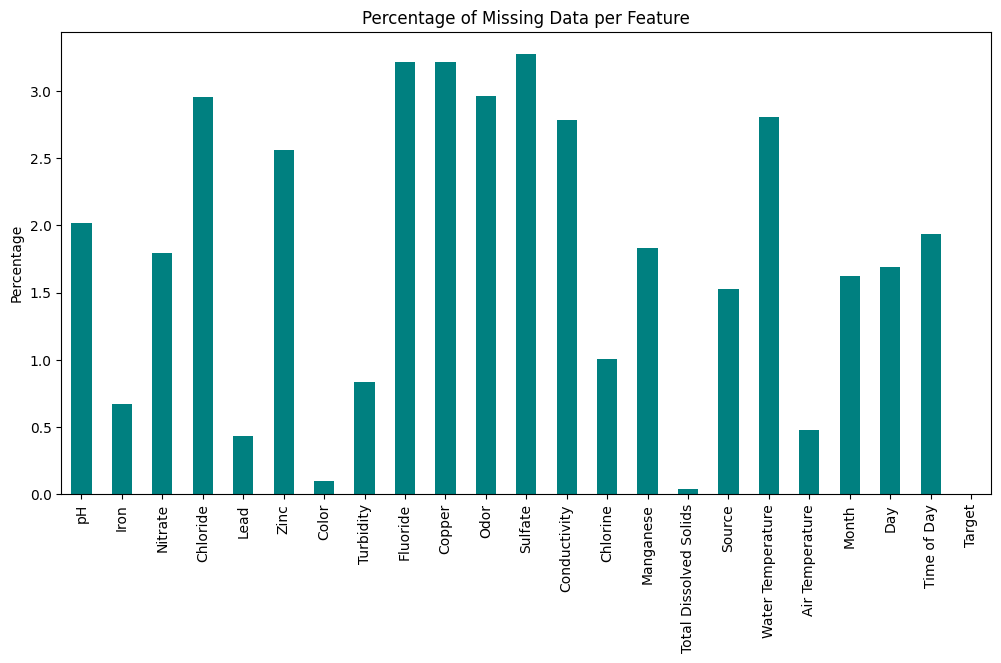

In [17]:
missing_data_percentage = df.isnull().mean() * 100
plt.figure(figsize=(12, 6))
missing_data_percentage.plot(kind='bar', color='teal')
plt.title('Percentage of Missing Data per Feature')
plt.ylabel('Percentage')
plt.show()

Bisa kita lihat bahwa, setiap fitur memiliki mising values namun missing valuesnya tidak sampai 30% maka tidak ada fitur yang akan saya hapus karena missing values.

Karena tidak ada fitur yang akan saya hapus maka saya akan mencoba untuk melihat terlebih dahulu fitur mana saja yang penting sebelum saya mencoba untuk mengisi missing values tersebut.

Dalam memilih fitur mana saja yang akan digunakan, saya akan menentukan terlebih dahulu apakah saya akan mengisi missing values dengan mean atau median. Kalau distribusi dari nilai fitur tersebut miring atau banyak outlier maka sebaiknya diisi dengan median, jika tidak sebaiknya diisi dengan mean.

Pertama kita handle missing values dari variabel yang berupa float64 atau bisa dikatakan numerikal, Kita melihatnya melalui Skewness atau Kemiringan
1. |Skewness| < 0.5 → Gunakan Mean (karena distribusi hampir normal)
2. |Skewness| ≥ 0.5 → Gunakan Median (karena distribusi sangat miring dan mean bisa terpengaruh oleh outlier)

In [23]:
float_cols = df.select_dtypes(include=['float64']).columns


In [24]:
for col in float_cols:
    skewness = df[col].skew()
    print(f'Skewness of {col}: {skewness:.2f}')

Skewness of pH: -0.09
Skewness of Iron: 8.42
Skewness of Nitrate: 2.12
Skewness of Chloride: 1.62
Skewness of Lead: 45.91
Skewness of Zinc: 1.99
Skewness of Turbidity: 4.51
Skewness of Fluoride: 2.10
Skewness of Copper: 2.98
Skewness of Odor: 0.16
Skewness of Sulfate: 1.69
Skewness of Conductivity: 0.91
Skewness of Chlorine: 0.73
Skewness of Manganese: 8.73
Skewness of Total Dissolved Solids: 0.05
Skewness of Water Temperature: 1.97
Skewness of Air Temperature: 0.01
Skewness of Day: 0.01
Skewness of Time of Day: -0.00


Dari hal tersebut, yang bisa kita lihat bahwa |Skewness| > 1 ada pada Iron, Nitrate, Chloride, Lead, Zinc, Turbidity, Fluoride, Copper, Sulfate, Manganese, dan Water Temperature. Maka fitur - fitur tersebut akan diisi dengan median. Sisanya yang dibawa 1 akan kita isi dengan Mean.

In [25]:
for col in float_cols:
    skewness = df[col].skew()
    print(f'Skewness of {col}: {skewness:.2f}')
    if abs(skewness) > 1:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

Skewness of pH: -0.09
Skewness of Iron: 8.42
Skewness of Nitrate: 2.12
Skewness of Chloride: 1.62
Skewness of Lead: 45.91
Skewness of Zinc: 1.99
Skewness of Turbidity: 4.51
Skewness of Fluoride: 2.10
Skewness of Copper: 2.98
Skewness of Odor: 0.16
Skewness of Sulfate: 1.69
Skewness of Conductivity: 0.91
Skewness of Chlorine: 0.73
Skewness of Manganese: 8.73
Skewness of Total Dissolved Solids: 0.05
Skewness of Water Temperature: 1.97
Skewness of Air Temperature: 0.01
Skewness of Day: 0.01
Skewness of Time of Day: -0.00


Untuk data yang berupa data kategorikal, akan kita isi dengan menggunakan modusnya.

In [26]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [27]:
df.isnull().sum()

pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Color                     0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Source                    0
Water Temperature         0
Air Temperature           0
Month                     0
Day                       0
Time of Day               0
Target                    0
dtype: int64

Bisa kita lihat bahwa tidak ada missing values lagi, maka sekarang kita akan melihat kepentingan fitur melalui Correlation Matrix, tapi kita harus membuat seluruh variabel menjadi numerikal dulu melalui label encoder.

In [28]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

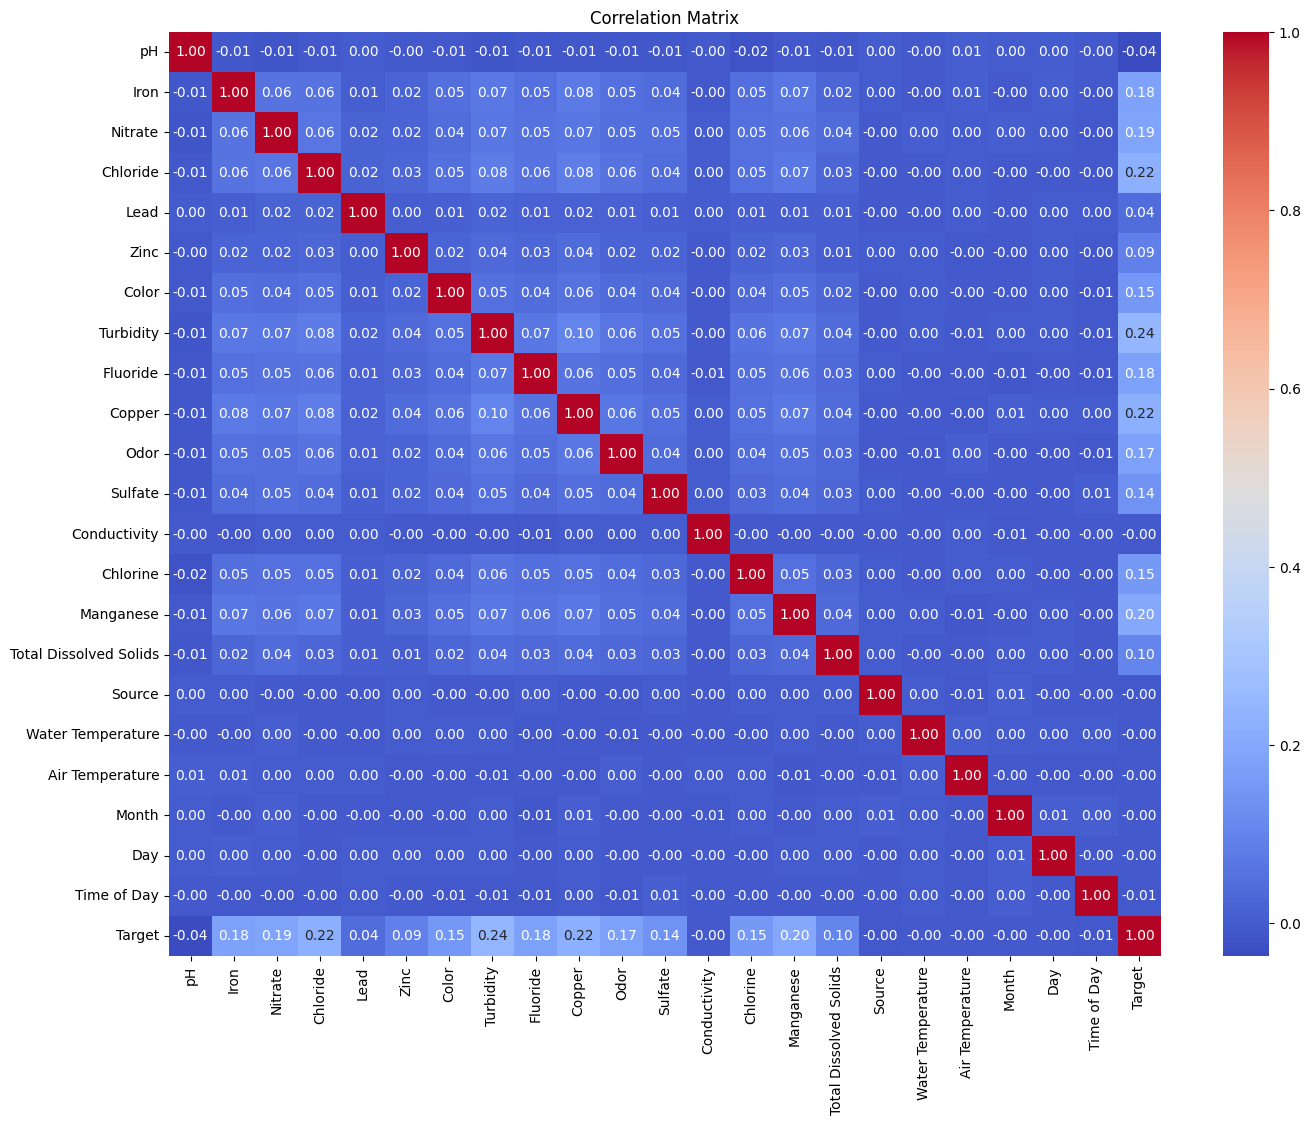

In [29]:
matrix = df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(matrix, annot=True, fmt = '.2f', cmap ='coolwarm',cbar=True)
plt.title('Correlation Matrix')
plt.show()

Dari Korelsi matrix tersebut, bisa kita lihat bahwa banyak korelasi yang dibawah 0.01 dengan Target maka akan saya drop semua fitur yang dibawah 0.01 dengan Target

In [30]:
low_correlation_features = matrix.columns[matrix.abs().max() <= 0.01]
target_corr = matrix['Target'].drop('Target')
low_correlation_features = target_corr[abs(target_corr) <= 0.01].index
df.drop(columns=low_correlation_features, inplace=True)
print(f"Dropped features with correlation ≤ 0.01 with Target: {list(low_correlation_features)}")

Dropped features with correlation ≤ 0.01 with Target: ['Conductivity', 'Source', 'Water Temperature', 'Air Temperature', 'Month', 'Day', 'Time of Day']


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   pH                      100000 non-null  float64
 1   Iron                    100000 non-null  float64
 2   Nitrate                 100000 non-null  float64
 3   Chloride                100000 non-null  float64
 4   Lead                    100000 non-null  float64
 5   Zinc                    100000 non-null  float64
 6   Color                   100000 non-null  int32  
 7   Turbidity               100000 non-null  float64
 8   Fluoride                100000 non-null  float64
 9   Copper                  100000 non-null  float64
 10  Odor                    100000 non-null  float64
 11  Sulfate                 100000 non-null  float64
 12  Chlorine                100000 non-null  float64
 13  Manganese               100000 non-null  float64
 14  Total Dissolved Solid

Terdapat 7 fitur yang didrop karena memiliki korelasi dengan Target Variabel dibawah 0.01, maka 14 fitur sisa akan digunakan untuk melatih model.

### Data Visualization

In [43]:
x = df.drop("Target", axis=1)
y = df.Target
X_train , X_test , y_train , y_test = train_test_split(x , y, test_size=0.25, random_state=42)

The percentage of waters that are safe to consume is: 30.31%


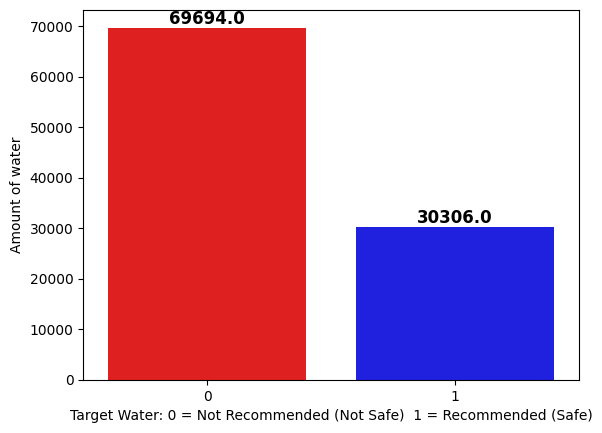

In [46]:
# Membuat countplot
ax = sns.countplot(x="Target", data=df, palette={0: 'red', 1: 'blue'})

# Menambahkan label jumlah spesifik di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Menambahkan label sumbu
plt.xlabel('Target Water: 0 = Not Recommended (Not Safe)  1 = Recommended (Safe)')
plt.ylabel('Amount of water')

# Menghitung persentase kelas minoritas
porc = (len(df[df.Target == 1]) / len(df.Target)) * 100
print('The percentage of waters that are safe to consume is: {:.2f}%'.format(porc))

# Menampilkan plot
plt.show()


In [47]:
df[df['Target']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
pH,30306.0,7.401200,1.206139,2.353677e+00,6.588483e+00,7.426962e+00,8.207067e+00,12.392381
Iron,30306.0,0.256520,0.705800,1.213643e-33,2.506304e-05,5.322584e-03,1.437983e-01,13.227677
Nitrate,30306.0,7.066329,4.159783,6.862541e-01,4.211627e+00,6.009580e+00,8.796990e+00,47.731739
Chloride,30306.0,206.510347,86.030724,4.310064e+01,1.470424e+02,1.877915e+02,2.497515e+02,993.933248
Lead,30306.0,0.004119,0.056839,0.000000e+00,4.568695e-120,3.443496e-61,1.002981e-25,4.656781
Zinc,30306.0,1.748559,1.858158,4.156215e-06,4.543103e-01,1.109233e+00,2.386227e+00,19.049807
Color,30306.0,2.008744,1.416180,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000
Turbidity,30306.0,0.848844,1.284014,5.468542e-10,6.324841e-02,3.331622e-01,1.106030e+00,17.335923
Fluoride,30306.0,1.174793,1.046740,3.615023e-04,4.341457e-01,8.530313e-01,1.598485e+00,12.988166
Copper,30306.0,0.706805,0.786138,6.258419e-07,1.695238e-01,4.244514e-01,9.727305e-01,8.133315


In [48]:
df[df['Target']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
pH,69694.0,7.471290,0.695197,3.007007e+00,6.990736e+00,7.457532e+00,7.954602e+00,12.116036
Iron,69694.0,0.070251,0.306017,9.298435e-39,7.191434e-06,1.656480e-03,3.726730e-02,11.545770
Nitrate,69694.0,5.743894,2.590441,5.875504e-01,3.898266e+00,5.479411e+00,7.247820e+00,51.613366
Chloride,69694.0,174.218290,54.455515,2.941350e+01,1.367923e+02,1.732297e+02,2.072289e+02,897.742848
Lead,69694.0,0.000723,0.024547,0.000000e+00,2.035191e-122,1.278705e-62,7.614124e-28,1.909483
Zinc,69694.0,1.451135,1.350718,1.270699e-07,4.223167e-01,1.082226e+00,2.113784e+00,18.866752
Color,69694.0,1.550951,1.368867,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,4.000000
Turbidity,69694.0,0.366366,0.627144,3.119116e-13,3.288689e-02,1.764363e-01,4.999281e-01,14.533207
Fluoride,69694.0,0.863344,0.653175,7.229551e-05,3.722799e-01,7.680604e-01,1.226174e+00,8.988691
Copper,69694.0,0.424929,0.440811,5.313946e-07,1.244918e-01,3.315330e-01,6.098121e-01,7.138660


Dari data ini, kita bisa melihat bahwa Data dari kelas 1 dan kelas 0 sangat skewed. Salah satu cara untuk mengatasinya adalah menggunkan Oversampling untuk menambah jumlah data di kelas minoritas menggunakan SMOTE atau bisa Undersampling dengan cara mengurangi jumlah data mayoritas agar seimbang dengan data minoritas. Namun sebelum itu, kita akan mencoba untuk melatih model terlebih dahulu jika presisi, recall, dan akurasi yang dihasilkan kurang baik baru kita akan melakukan penanganannya.

In [53]:
# Memisahkan fitur dan target
X = df.drop(columns=['Target'])
y = df['Target']

# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Melatih model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = model.predict(X_test)

# Menampilkan classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     13939
           1       0.73      0.98      0.83      6061

    accuracy                           0.88     20000
   macro avg       0.86      0.91      0.87     20000
weighted avg       0.91      0.88      0.88     20000



In [58]:
train_accuracy = model.score(X_train, y_train)  # Akurasi pada data training setelah SMOTE
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}')

Training Accuracy: 1.0000
Testing Accuracy: 0.8807


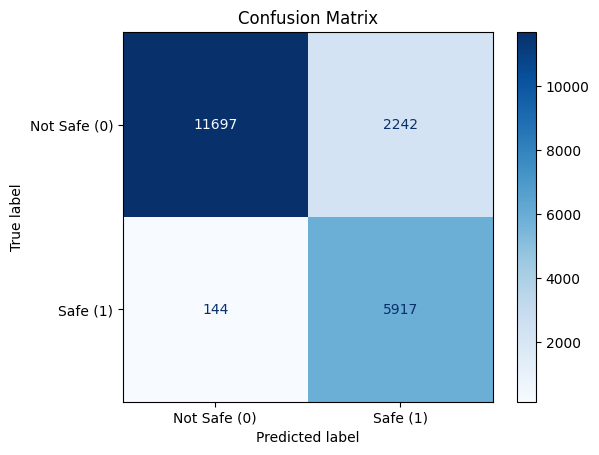

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix dengan visualisasi
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Safe (0)', 'Safe (1)'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


Bisa dilihat bahwa akurasi yang dihasilkan sudah cukup baik namun terdapat indikasi bahwa terjadi suatu overfitting pada model dimana bisa kita lihat training accuracy jauh lebih tinggi dibanding testing accuracy.

Maka sekarang kita akan mencoba untuk melakukan Oversampling technique yaitu SMOTE

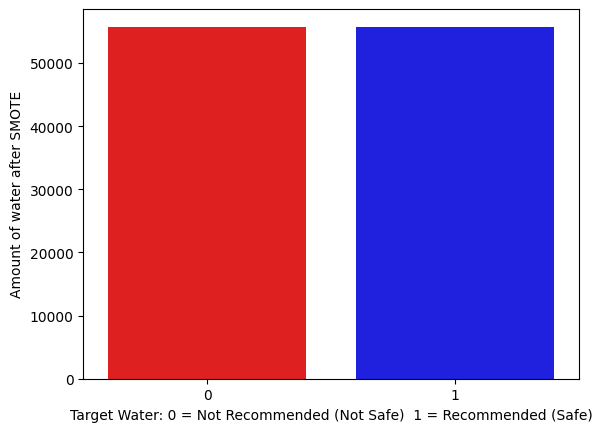

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     13939
           1       0.72      0.98      0.83      6061

    accuracy                           0.88     20000
   macro avg       0.86      0.91      0.87     20000
weighted avg       0.91      0.88      0.88     20000



In [59]:
# Memisahkan fitur dan target
X = df.drop(columns=['Target'])
y = df['Target']

# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Mengecek distribusi kelas setelah SMOTE
sns.countplot(x=y_train_resampled, palette={0: 'red', 1: 'blue'})
plt.xlabel('Target Water: 0 = Not Recommended (Not Safe)  1 = Recommended (Safe)')
plt.ylabel('Amount of water after SMOTE')
plt.show()

# Melatih model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Memprediksi data uji
y_pred = model.predict(X_test)

# Menampilkan classification report
print(classification_report(y_test, y_pred))


In [61]:
train_accuracy = model.score(X_train_resampled, y_train_resampled)  # Akurasi pada data training setelah SMOTE
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}')

Training Accuracy: 1.0000
Testing Accuracy: 0.8805


Bisa dilihat bahwa menggunakan SMOTE menghasilkan hasil yang tidak jauh yaitu overfitting, maka dari itu kita tidak akan menggunakan Metode Oversampling SMOTE.

Sekarang kita akan mencoba untuk menggunakan Undersampling Technique

In [62]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Pisahkan fitur dan target
X = df.drop(columns=['Target'])
y = df['Target']

# Inisialisasi undersampling
rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)

# Terapkan undersampling
X_resampled, y_resampled = rus.fit_resample(X, y)

# Cek distribusi kelas setelah undersampling
print("Distribusi kelas sebelum undersampling:", Counter(y))
print("Distribusi kelas setelah undersampling:", Counter(y_resampled))

# Bagi ulang data menjadi training dan testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Train ulang dengan Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)

# Evaluasi model
print("Training Accuracy:", clf.score(X_train, y_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Distribusi kelas sebelum undersampling: Counter({0: 69694, 1: 30306})
Distribusi kelas setelah undersampling: Counter({0: 30306, 1: 30306})
Training Accuracy: 1.0
Testing Accuracy: 0.9146250927988122

Confusion Matrix:
 [[5126  936]
 [  99 5962]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      6062
           1       0.86      0.98      0.92      6061

    accuracy                           0.91     12123
   macro avg       0.92      0.91      0.91     12123
weighted avg       0.92      0.91      0.91     12123



Hasil yang diberikan bisa dikatakan lebih baik, akan tetapi untuk Training Accuracy dan Testing Accuracy bisa kita lihat masih ada indikasi overfitting, untuk itulah saya akan tetap menggunakan yang normal tanpa Undersampling dan Oversampling namun saya akan mencoba untuk melakukan standarisasi dan regularisasi.

# 5. Modelling

### Model pertama: Random Forest dengan Standarisasi dan Regularisasi

In [63]:
# Pisahkan fitur dan target
X = df.drop(columns=['Target'])  
y = df['Target']

# Pisahkan data train & test (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standarisasi fitur numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inisialisasi Random Forest dengan regularisasi
clf = RandomForestClassifier(
    n_estimators=100,       # Jumlah pohon dalam hutan
    max_depth=10,           # Membatasi kedalaman pohon untuk mencegah overfitting
    min_samples_split=5,    # Minimal sampel untuk membagi node
    min_samples_leaf=2,     # Minimal sampel dalam leaf node
    random_state=42
)

# Latih model
clf.fit(X_train, y_train)

# Prediksi
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Evaluasi
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 0.8739
Testing Accuracy: 0.8663

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90     13939
           1       0.72      0.91      0.80      6061

    accuracy                           0.87     20000
   macro avg       0.84      0.88      0.85     20000
weighted avg       0.88      0.87      0.87     20000



Model yang didapat ini meskipun Training Accuracynya turun bisa dikatakan bahwa indikasi overfitting sudah sangat berkurang.

### Model Kedua: KNN

Training Accuracy: 0.8575
Testing Accuracy: 0.8144

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     13848
           1       0.74      0.62      0.67      6152

    accuracy                           0.81     20000
   macro avg       0.79      0.76      0.77     20000
weighted avg       0.81      0.81      0.81     20000



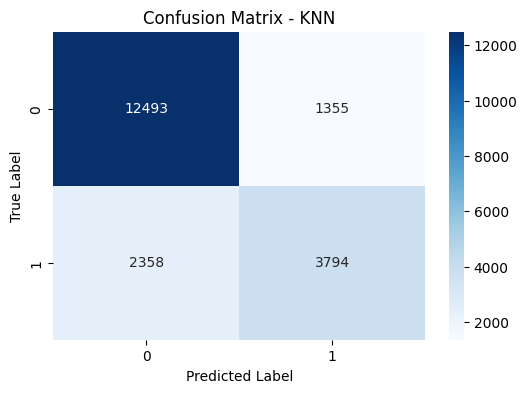

In [66]:
# 1️⃣ Membagi Data menjadi Train dan Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2️⃣ Standarisasi Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3️⃣ Melatih Model KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Bisa coba ganti jumlah neighbor
knn.fit(X_train_scaled, y_train)

# 4️⃣ Prediksi dengan Model KNN
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

# 5️⃣ Mencetak Akurasi
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

# 6️⃣ Mencetak Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# 7️⃣ Plot Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN")
plt.show()


Bisa dilihat dari akurasi, indikasi overfitting juga sedikit namun bisa dilihat dari recallnya yang kurang baik untuk kelas 1 maka model ini tidak akan saya gunakan.

### Model Ketiga: SVM

Training Accuracy: 0.8612
Testing Accuracy: 0.8578

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89     13848
           1       0.74      0.84      0.78      6152

    accuracy                           0.86     20000
   macro avg       0.83      0.85      0.84     20000
weighted avg       0.87      0.86      0.86     20000



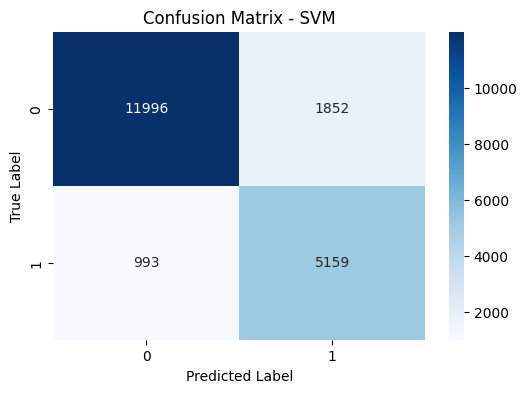

In [67]:
# 1️⃣ Membagi Data menjadi Train dan Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2️⃣ Standarisasi Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3️⃣ Melatih Model SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Kernel RBF dengan hyperparameter default
svm_model.fit(X_train_scaled, y_train)

# 4️⃣ Prediksi dengan Model SVM
y_train_pred = svm_model.predict(X_train_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

# 5️⃣ Mencetak Akurasi
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

# 6️⃣ Mencetak Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# 7️⃣ Plot Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()


Dari Ketiga model tersebut, kita bisa melihat bahwa performa terbaik didapatkan oleh Random Forest Model yang mendapatkan Accuracy, Recall, dan F1-Score yang tertinggi maka kita akan menggunakan Model Random Forest dan melihat Feature Importance dari Model Random Forest.

Dalam melihat Feature Importance di Model Random Forest, bisa kita gunakan Data yang belum distandarisasi karena Feature importance dalam Random Forest atau model berbasis pohon keputusan (Decision Tree, XGBoost, dll.) dihitung berdasarkan frekuensi dan efektivitas fitur dalam membagi data. Standarisasi tidak diperlukan karena model pohon tidak bergantung pada skala fitur.

In [68]:
x = df.drop("Target", axis=1)
y = df.Target
X_train , X_test , y_train , y_test = train_test_split(x , y, test_size=0.25, random_state=42)

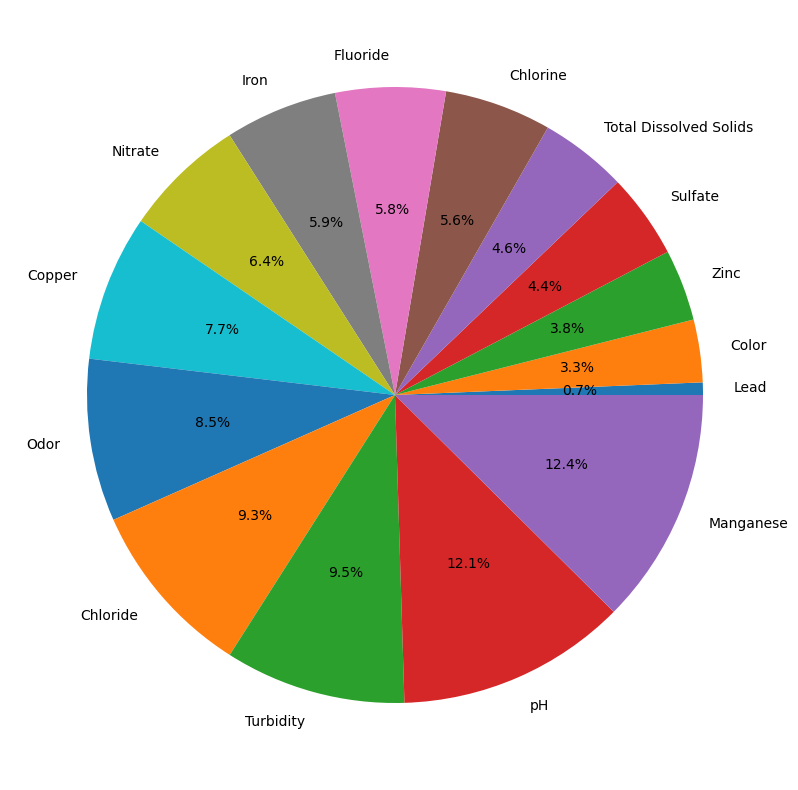

In [69]:
RF = RandomForestClassifier()
RF.fit(x,y)

variables = x.columns
importance = pd.DataFrame()

importance['Features'] = variables
importance['Importance'] = RF.feature_importances_
importance = importance.sort_values(by=['Importance'],ascending=True)

labels = importance['Features']
values = importance['Importance']

plt.figure(figsize=(10,10))
plt.pie(values, labels=labels,autopct='%0.1f%%')
plt.show()

Dari Feature Importance, kita bisa melihat bahwa Manganese, pH, Turbidiry, Chloride, Odor, dan Copper merupakan Fitur yang penting dan tidak boleh didrop.

Setelah itu kita akan membandingkan Feature Importance dengan Correlation Matrix

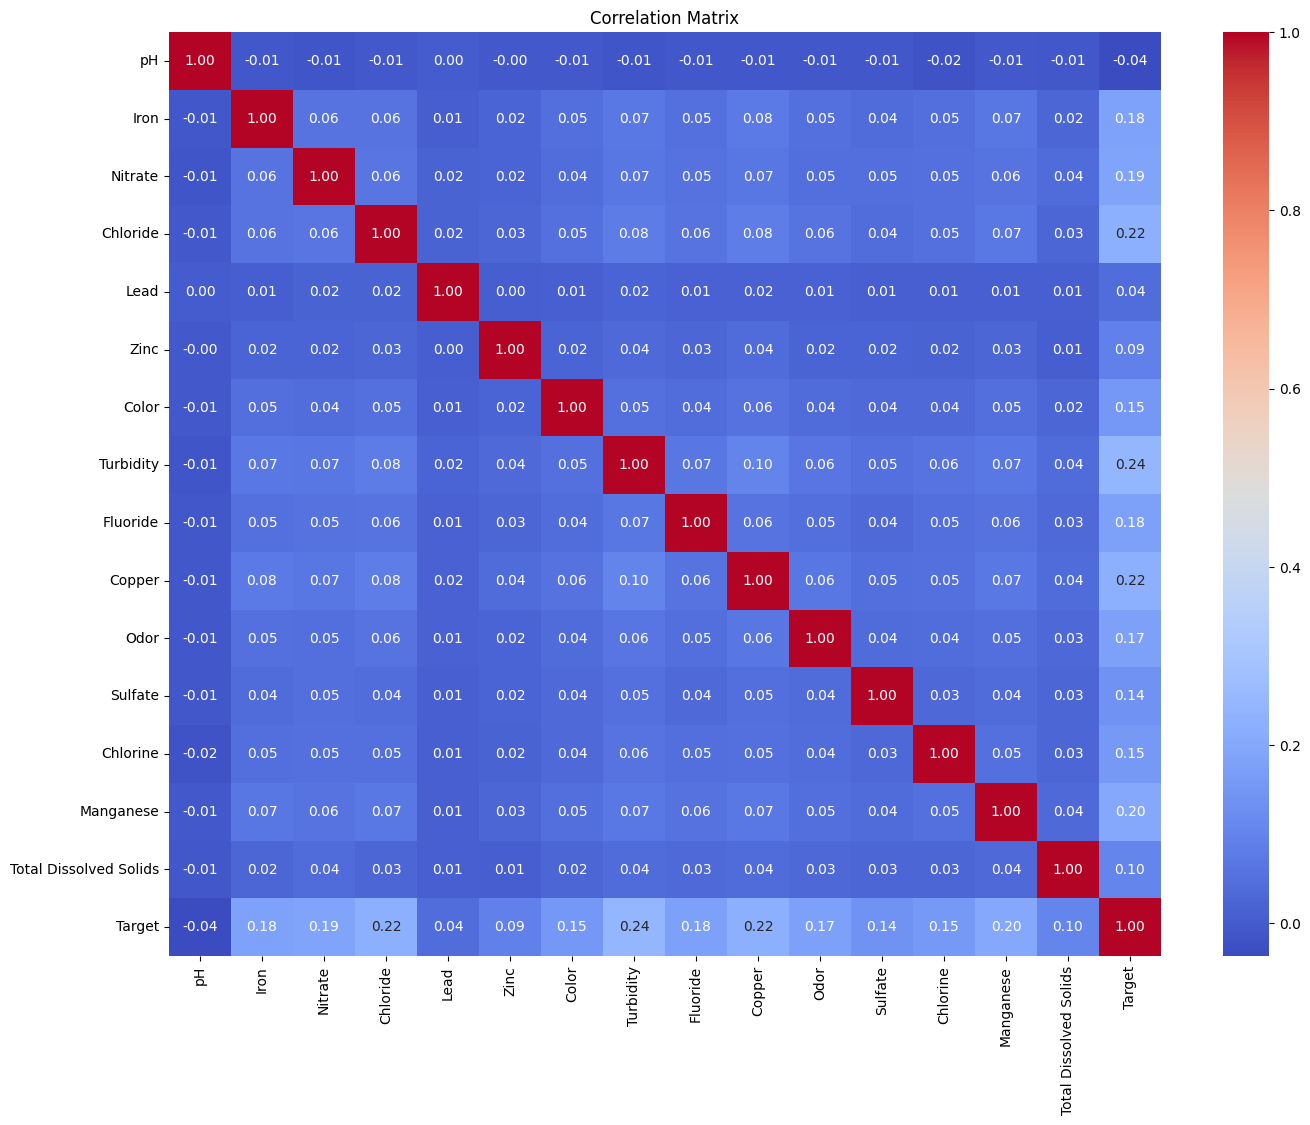

In [70]:
matrix = df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(matrix, annot=True, fmt = '.2f', cmap ='coolwarm',cbar=True)
plt.title('Correlation Matrix')
plt.show()

🔍 Analisis & Temuan:

1. Fitur dengan Feature Importance dan Korelasi Tinggi:

Turbidity (9.5%, 0.24), Chloride (9.3%, 0.22), Copper (7.7%, 0.22), dan Manganese (12.4%, 0.20) adalah fitur yang sangat penting menurut model dan juga memiliki korelasi yang cukup tinggi terhadap target.

🟢 Kesimpulan: Fitur-fitur ini penting dan harus dipertahankan dalam model.

2. Fitur dengan Feature Importance Tinggi Tapi Korelasi Rendah:

pH memiliki importance 12.1% tetapi korelasi -0.04 terhadap target.

🟡 Kesimpulan: Model bisa saja terlalu bergantung pada pH, meskipun hubungannya dengan target sangat lemah.

3. Fitur dengan Korelasi Relatif Rendah dan Importance Kecil:

Zinc (3.8%, 0.09), Color (3.3%, 0.15), dan Lead (0.7%, 0.04) memiliki pengaruh rendah terhadap model dan juga korelasi lemah terhadap target.

🔴 Kesimpulan: Fitur ini bisa dicoba untuk dihapus dari model karena kemungkinan besar hanya menambah noise.

Berdasarkan analisis di atas, pertama saya akan mencoba untuk melatihnya dengan fitur yang paling penting yaitu Turbidity, Chloride, Copper, dan Manganese.

In [ ]:
X = df[['Turbidity', 'Chloride', 'Copper', 'Manganese']]
y = df.Target
# Pisahkan data train & test (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standarisasi fitur numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inisialisasi Random Forest dengan regularisasi
clf = RandomForestClassifier(
    n_estimators=100,       # Jumlah pohon dalam hutan
    max_depth=10,           # Membatasi kedalaman pohon untuk mencegah overfitting
    min_samples_split=5,    # Minimal sampel untuk membagi node
    min_samples_leaf=2,     # Minimal sampel dalam leaf node
    random_state=42
)

# Latih model
clf.fit(X_train, y_train)

# Prediksi
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Evaluasi
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.8355
Testing Accuracy: 0.8304

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     13939
           1       0.72      0.71      0.72      6061

    accuracy                           0.83     20000
   macro avg       0.80      0.80      0.80     20000
weighted avg       0.83      0.83      0.83     20000



Akurasinya yang dihasilkan menjadi lebih buruk dari sebelumnya, oleh karena itu untuk percobaan selanjutnya akan melakukan drop fitur - fitur yang memiliki korelasi serta Feature Importance yang rendah dan sisanya akan digunakan untuk melatih model.

In [ ]:
X = df.drop(columns=['Lead', 'Color', 'Zinc', 'Sulfate','Target'])
# df.head()
y = df.Target
# Pisahkan data train & test (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standarisasi fitur numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inisialisasi Random Forest dengan regularisasi
clf = RandomForestClassifier(
    n_estimators=100,       # Jumlah pohon dalam hutan
    max_depth=10,           # Membatasi kedalaman pohon untuk mencegah overfitting
    min_samples_split=5,    # Minimal sampel untuk membagi node
    min_samples_leaf=2,     # Minimal sampel dalam leaf node
    random_state=42
)

# Latih model
clf.fit(X_train, y_train)

# Prediksi
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Evaluasi
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.8749
Testing Accuracy: 0.8685

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90     13939
           1       0.72      0.91      0.81      6061

    accuracy                           0.87     20000
   macro avg       0.84      0.88      0.85     20000
weighted avg       0.89      0.87      0.87     20000



Hasil yang didapat lebih baik dari sebelumnya, oleh karena itu kami memutuskan untuk menggunakan fitur - fitur tersebut.

Dengan ini fitur yang digunakan adalah: Manganese, pH, Turbidity, Chloride, Odor, Copper, Nitrate, Iron, Fluoride, Chlorine, Total Dissolved Solids

Selain mencoba melakukan Feature Selection, kita juga akan mencoba untuk menambahkan Threshold dikarenakan class 1 dan 0 yang berbeda cukup jauh jumlahnya sehingga threshold cocok untuk digunakan dalam kondisi ini.

In [54]:
# Define features and target
X = df.drop(columns=['Lead', 'Color', 'Zinc', 'Sulfate', 'Target'])
y = df['Target']

# Split train-test data (stratified sampling to maintain class proportions)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modify RandomForestClassifier with class weights
clf = RandomForestClassifier(
    n_estimators=200,       # More trees for stability
    max_depth=15,           # Allow more depth for learning
    min_samples_split=5,    
    min_samples_leaf=2,     
    class_weight={0: 1.0, 1: 2.3},  # Adjusted for class imbalance
    random_state=42
)

# Train model
clf.fit(X_train, y_train)

# Predict probabilities instead of labels
y_probs = clf.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Use best threshold (adjusted based on analysis)
best_threshold = 0.7
y_test_pred = (y_probs > best_threshold).astype(int)

# Evaluate model
train_acc = accuracy_score(y_train, clf.predict(X_train))
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.8838
Testing Accuracy: 0.8721

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.90     13939
           1       0.72      0.93      0.82      6061

    accuracy                           0.87     20000
   macro avg       0.85      0.89      0.86     20000
weighted avg       0.89      0.87      0.88     20000


Confusion Matrix:
[[11780  2159]
 [  399  5662]]


Dan bisa dilihat bahwa hasilnya lebih baik dibanding sebelumnya, oleh karena itu kami memutuskan untuk menggunakan Threshold sebesar 0.7

Kemudian akan dilakukan penyimpanan Model

In [ ]:
import joblib

# Define the best threshold
best_threshold = 0.7

# Save everything in a dictionary
model_data = {
    "model": clf,                # Trained Random Forest model
    "scaler": scaler,            # StandardScaler to transform input data
    "best_threshold": best_threshold  # Best decision threshold
}   

# Save to a file
joblib.dump(model_data, "water_quality_modelnew.pkl")

print("Model, scaler, and best threshold saved successfully! ✅")


Model, scaler, and best threshold saved successfully! ✅
